In [1]:
from collections import deque
from itertools import cycle
import numpy as np
from matplotlib import pyplot as plt
import torch

In [2]:
from environment import TicTacToeEnv
from agent import Agent

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
env = TicTacToeEnv()

In [5]:
X = Agent("X", state_size=env.size, action_size=env.size, device=device, seed=2022)
O = Agent("O", state_size=env.size, action_size=env.size, device=device, seed=2022)

In [6]:
"""Deep Q-Learning.

Params
======
    n_episodes (int): maximum number of training episodes
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
"""
n_episodes=50000
eps_start=1.0
eps_end=0.01
eps_decay=0.995

In [7]:
# maybe should use max_t
scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon
outcomes = {"win": 0, "mistake": 0, "withdraw": 0}
for i_episode in range(1, n_episodes + 1):
    state = env.reset()
    it = cycle([X, O])
    score = {X: 0, O: 0}
    while True:
        agent = next(it)
        action = agent.act(state, eps)
        next_state, reward, done, info = env.step(state, action)
        agent.step(state, action, reward, next_state, done)
        state = next_state * -1 # needed to adapt to the next player's perspective
        score[agent] += reward
        if done:
            outcomes[info["outcome"]] += 1
            break 
    eps = max(eps_end, eps_decay*eps)  # decrease epsilon

    max_score = max(score.values())

    scores_window.append(max_score)       
    scores.append(max_score)              # save most recent score
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 1000 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window) > 1.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'model.pt')
        break
print(outcomes)

Episode 1000	Average Score: 0.00
Episode 2000	Average Score: 0.00
Episode 3000	Average Score: 0.00
Episode 4000	Average Score: 0.00
Episode 5000	Average Score: 0.00
Episode 6000	Average Score: 0.00
Episode 7000	Average Score: 0.00
Episode 8000	Average Score: 0.00
Episode 9000	Average Score: 0.00
Episode 10000	Average Score: 0.00
Episode 10446	Average Score: 0.00

KeyboardInterrupt: 

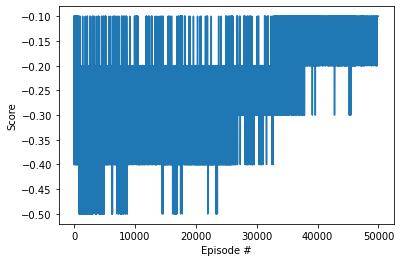

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()